# DivNoising - Image Generation
This notebook contains an example on how to use a previously trained DivNoising VAE to sample artificial images. If you haven't done so please first run 'Convallaria-CreateNoiseModel.ipynb' and 'Convallaria-Training.ipynb', which will download the data, create a noise model and train the VAE. 

In [1]:
# We import all our dependencies.
import urllib
import os
import zipfile
import numpy as np
from tqdm import tqdm
from tifffile import imread
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../../')

from divnoising import dataLoader
from divnoising import utils
from divnoising import training
from nets import model
import torch
from divnoising.utils import loadImages

from tqdm import tqdm

# Load real data to compare generated images against

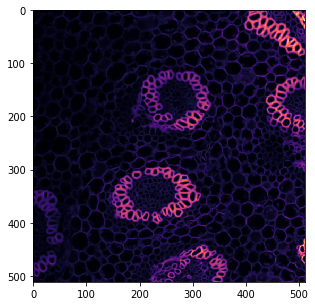

In [2]:
path="data/Convallaria_diaphragm/"

observation= imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif').astype(np.float32)[:,:512,:512]
signal=np.mean(observation[:,...],axis=0)[np.newaxis,...]
img_width, img_height = signal.shape[1], signal.shape[2]

plt.figure(figsize=(15, 5))
plt.imshow(signal[0],cmap='magma')

# Load trained model and generate images

(6, 24, 24)


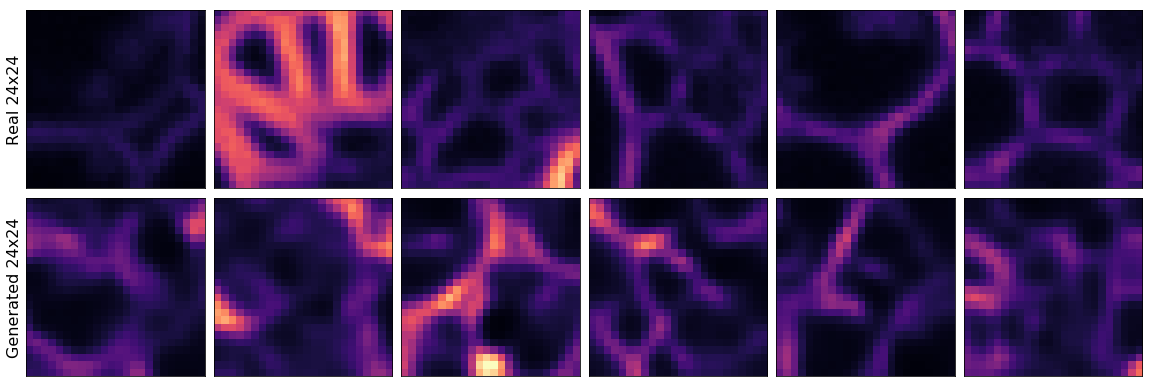

In [3]:
vae = torch.load('convallaria-last_vae.net')

numSamp=6 

# Here we are creating the samples.
# You can create larger or smaller images by changing the 'size' parameter.
# It controls the pixel size of the latent space.
samples=utils.getSamples(vae, size=6, samples=numSamp)
vmin=np.percentile(signal[0],0)
vmax=np.percentile(signal[0],98)
print(samples.shape)
size=samples.shape[1]
plt.figure(figsize=(20, 6.75))

# This loop will simply display the images together with randomly selected crops from the real data.
for i in range (samples.shape[0]):
    ax=plt.subplot(2,numSamp,i+1+numSamp)
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    ax.get_xaxis().set_visible(False)
    plt.yticks([])
    if i==0:      
        plt.ylabel('Generated '+str(size)+'x'+str(size), fontsize=16)
    plt.imshow(samples[i],vmin=vmin, vmax=vmax,cmap='magma')
    
    minx=np.random.randint(0,signal.shape[1]-size)
    miny=np.random.randint(0,signal.shape[2]-size)
    gt=signal[0][minx:minx+size,miny:miny+size]
    ax=plt.subplot(2,numSamp,i+1)
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    ax.get_xaxis().set_visible(False)
    plt.yticks([])
    if i==0:      
        plt.ylabel('Real '+str(size)+'x'+str(size), fontsize=16)
    plt.imshow(gt,vmin=vmin, vmax=vmax,cmap='magma')
    
plt.show()